In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv('gld_price_data.csv')

In [81]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [82]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [83]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [84]:
df.shape

(2290, 6)

In [85]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

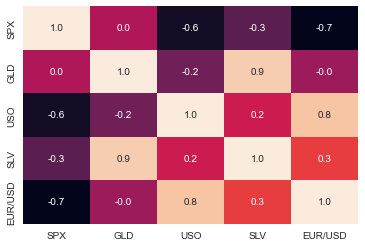

In [86]:
sns.heatmap(df.corr(),annot=True,cbar=False,fmt='.1f')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD'>

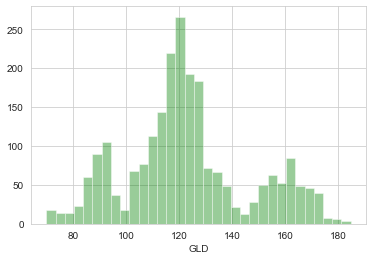

In [87]:
sns.set_style('whitegrid')
sns.distplot(df['GLD'],kde=False,color='green')

In [88]:
df.corr()['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [89]:
X = df.drop(columns=['GLD','Date'],axis=1)
y = df['GLD']

In [90]:
# X

In [91]:
# y

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf = RandomForestRegressor(n_estimators=100)

In [96]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
pred_train = rf.predict(X_train)

In [98]:
from sklearn import metrics

In [99]:
metrics.r2_score(y_train, pred_train)

0.9984489114121221

In [100]:
pred_test = rf.predict(X_test)

In [101]:
metrics.r2_score(y_test, pred_test)

0.9894878927428692

In [104]:
y_test = list(y_test)

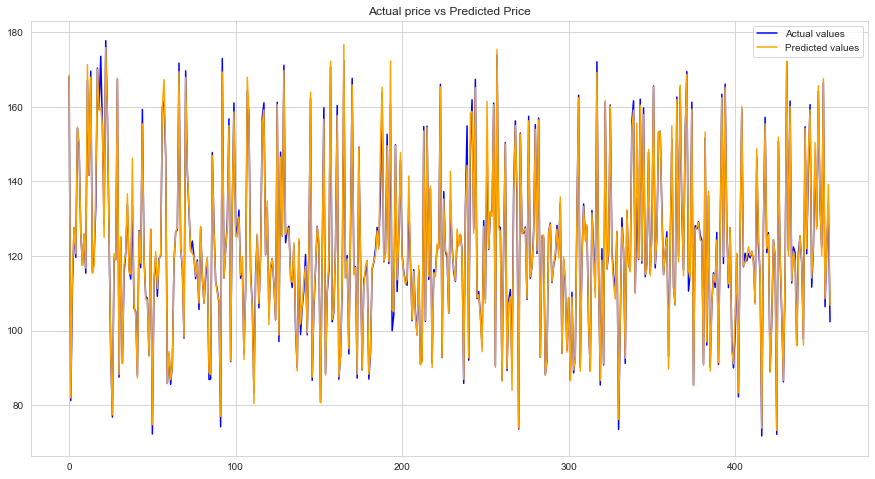

In [108]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color = 'blue', label='Actual values')
plt.plot(pred_test, color = 'orange', label='Predicted values')
plt.title('Actual price vs Predicted Price')
plt.legend()

In [ ]:
plt.scatterplot(x='')

In [102]:
input_data = (1447.160034,78.470001,15.180,1.471692)

arr = np.asarray(input_data)

arr_reshaped = arr.reshape(1,-1)

rf.fit(X_train,y_train)

pred = rf.predict(arr_reshaped)

pred

array([85.10400021])

In [103]:
input_data = (2671.919922,14.0600,15.5100,1.186789)

arr = np.asarray(input_data)

arr_reshaped = arr.reshape(1,-1)

rf.fit(X_train,y_train)

pred = rf.predict(arr_reshaped)

pred

array([123.84749742])